<a href="https://colab.research.google.com/github/teddy-teem/deep-learning/blob/master/Building_ANNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Set random seeds for reproducibility

torch.manual_seed(42)

In [ ]:
df = pd.read_csv('fmnist_small.csv')
df.shape

(6000, 785)

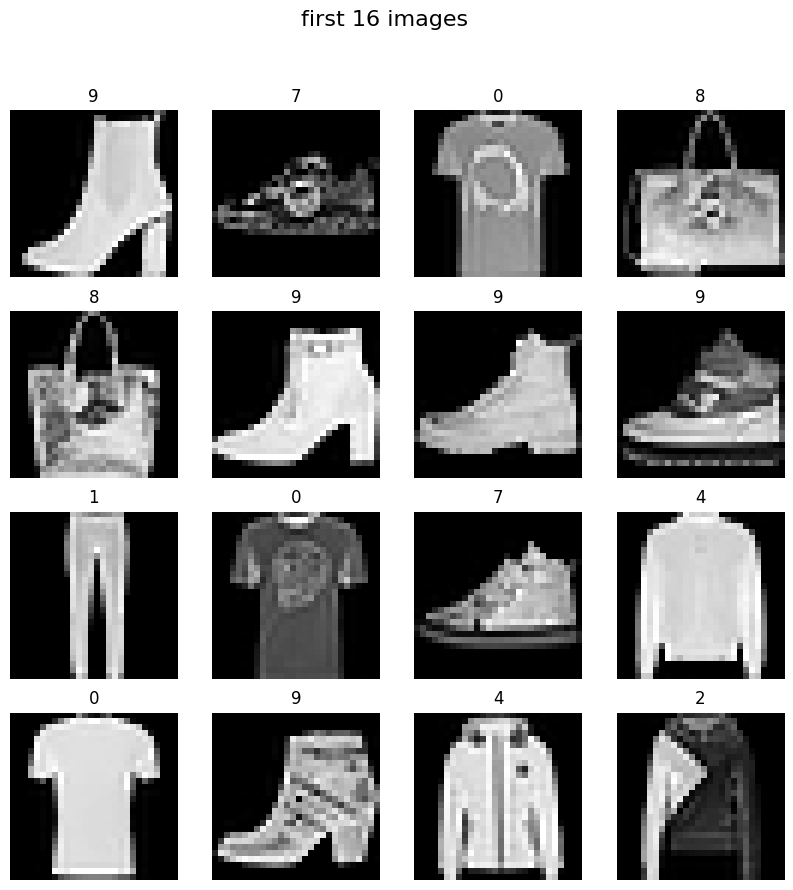

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(10, 10))
fig.suptitle("first 16 images", fontsize=16)

for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28,28)
    ax.axis('off')
    ax.set_title(df.iloc[i, 0])
    ax.imshow(img, cmap='gray')

plt.show()

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# For better tuning, the pixel value should be between 0 to 1 that why we devided by 255 each
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features =torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, index):
        return self.features[index], self.labels[index]

    def __len__(self):
        return len(self.features)

In [ ]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
len(train_dataset)

4800

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class MyNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
          )
    def forward(self, x):
        return self.model(x)

In [ ]:
epochs = 1000
learning_rate = 0.05


In [ ]:
model = MyNN(X_train.shape[1])

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
len(train_loader)

150

In [ ]:
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    out = model(batch_features)
    loss = criterion(out, batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss += loss.item()

  print(f"Epoch {epoch+1}, Loss: {total_epoch_loss/len(train_loader)}")


Epoch 1, Loss: 1.6265122489134471
Epoch 2, Loss: 0.9057761549949646
Epoch 3, Loss: 0.7648761320114136
Epoch 4, Loss: 0.6831172428528468
Epoch 5, Loss: 0.6227008823553721
Epoch 6, Loss: 0.5729337217410405
Epoch 7, Loss: 0.5391575558980306
Epoch 8, Loss: 0.5183151626586914
Epoch 9, Loss: 0.5055315084258716
Epoch 10, Loss: 0.47343532274166744
Epoch 11, Loss: 0.46074396510918936
Epoch 12, Loss: 0.44125606685876845
Epoch 13, Loss: 0.42272304023305574
Epoch 14, Loss: 0.42653478145599366
Epoch 15, Loss: 0.3879202224810918
Epoch 16, Loss: 0.38482594658931096
Epoch 17, Loss: 0.3697903581957022
Epoch 18, Loss: 0.3654201271633307
Epoch 19, Loss: 0.35472366084655127
Epoch 20, Loss: 0.3430908820529779
Epoch 21, Loss: 0.3274772283434868
Epoch 22, Loss: 0.3144941415389379
Epoch 23, Loss: 0.3137184543410937
Epoch 24, Loss: 0.3098652604222298
Epoch 25, Loss: 0.29183119893074033
Epoch 26, Loss: 0.28797882854938506
Epoch 27, Loss: 0.2798757347961267
Epoch 28, Loss: 0.2662644921739896
Epoch 29, Loss: 0.25

In [ ]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    out = model(batch_features)
    _, predicted = torch.max(out.data, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 83.91666666666667%
